In [1]:
from upsetplot import UpSet
import upsetplot 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

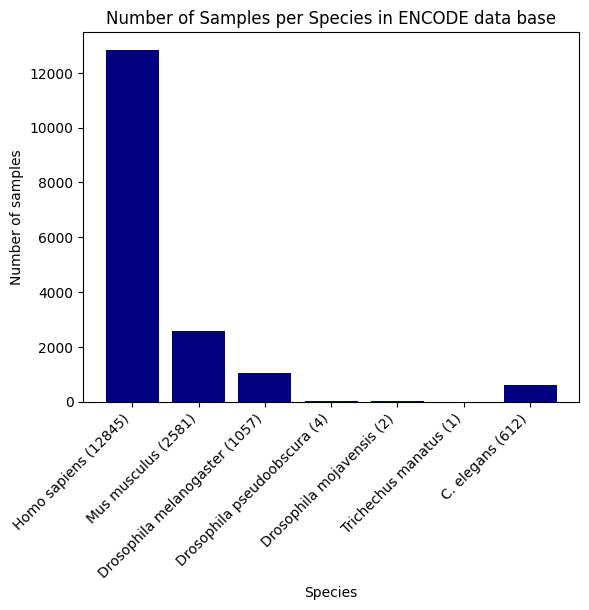

In [9]:
# Data
species = ['Homo sapiens (12845)', 'Mus musculus (2581)', 'Drosophila melanogaster (1057)', 'Drosophila pseudoobscura (4)', 
           'Drosophila mojavensis (2)', 'Trichechus manatus (1)', 'C. elegans (612)']
counts = [12845, 2581, 1057, 4, 2, 1, 612]

#Homo sapiens (12845 samples), Mus musculus (2581), Drosophila melanogaster (1057), 
#Caenorhabditis elegans (612), Drosophila pseudoobscura (4), Drosophila mojavensis (2) and Trichechus manatus (1).1 

# Create a bar plot
plt.bar(species, counts, color="navy")

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Number of samples')
plt.title('Number of Samples per Species in ENCODE data base')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

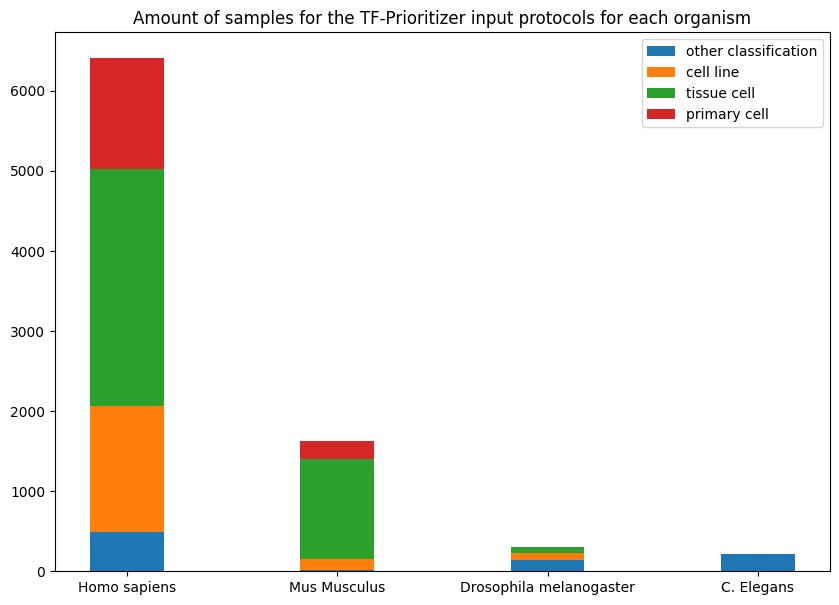

In [49]:
# how many cell line samples do we have for our input protocolls for the different organisms
N = 4
 
cell_line = np.array([1570, 130, 85, 0])
tissue_cells = np.array([2958, 1252, 77, 0])
primary_cells = np.array([1389, 220, 0, 0])
other =  np.array([494, 22, 139, 218])
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, other, width)
p2 = plt.bar(ind, cell_line, width, bottom = other)
p3 = plt.bar(ind, tissue_cells, width, bottom = other+cell_line)
p4 = plt.bar(ind, primary_cells, width, bottom =  other+cell_line+tissue_cells)

#plt.ylabel('Contribution')
plt.title('Amount of samples for the TF-Prioritizer input protocols for each organism')
plt.xticks(ind, ('Homo sapiens', 'Mus Musculus', 'Drosophila melanogaster', 'C. Elegans'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('other classification', 'cell line', 'tissue cell', 'primary cell'))
 
plt.show()

## Cell line

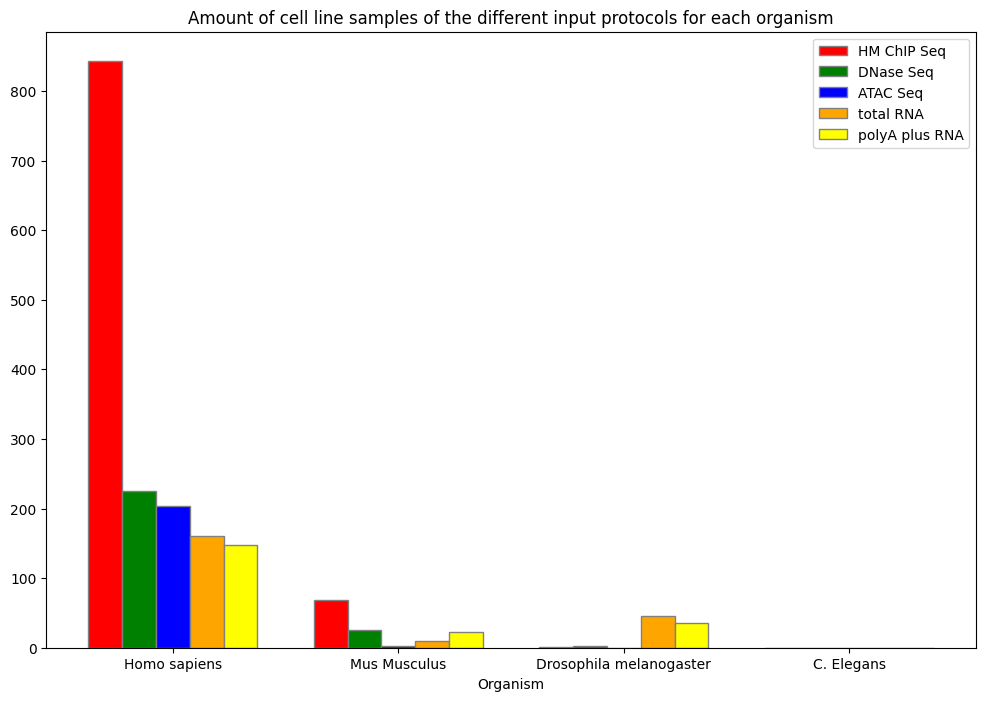

In [33]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
ChIP = [843, 69, 1, 0]
DNase = [225, 25, 3, 0]
ATAC = [203, 3, 0, 0]
RNA_total = [161, 10, 46, 0]
RNA_polyA = [147, 23, 35, 0]
 
# Set position of bar on X axis
br1 = np.arange(len(ChIP))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
 
# Make the plot
plt.bar(br1, ChIP, color ='r', width = barWidth,
        edgecolor ='grey', label ='HM ChIP Seq')
plt.bar(br2, DNase, color ='g', width = barWidth,
        edgecolor ='grey', label ='DNase Seq')
plt.bar(br3, ATAC, color ='blue', width = barWidth,
        edgecolor ='grey', label ='ATAC Seq')
plt.bar(br4, RNA_total, color ='orange', width = barWidth,
        edgecolor ='grey', label ='total RNA')
plt.bar(br5, RNA_polyA, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='polyA plus RNA')
    
# Adding Xticks
plt.xlabel('Organism')
plt.xticks([r + barWidth*2 for r in range(len(ChIP))],
        ['Homo sapiens','Mus Musculus','Drosophila melanogaster','C. Elegans'])
plt.title('Amount of cell line samples of the different input protocols for each organism')
plt.legend()
plt.show()

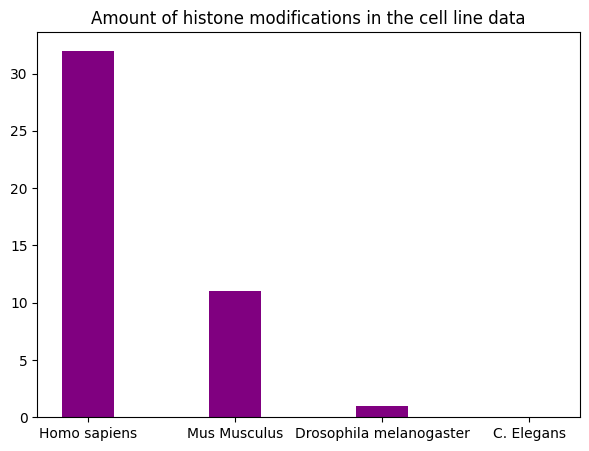

In [43]:
# number of histone mods
N = 4
 
mods = (32, 11, 1, 0)
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(7, 5))
p1 = plt.bar(ind, mods, width, color='purple')
 
#plt.ylabel('Contribution')
plt.title('Amount of histone modifications in the cell line data')
plt.xticks(ind, ('Homo sapiens', 'Mus Musculus', 'Drosophila melanogaster', 'C. Elegans'))

plt.show()

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

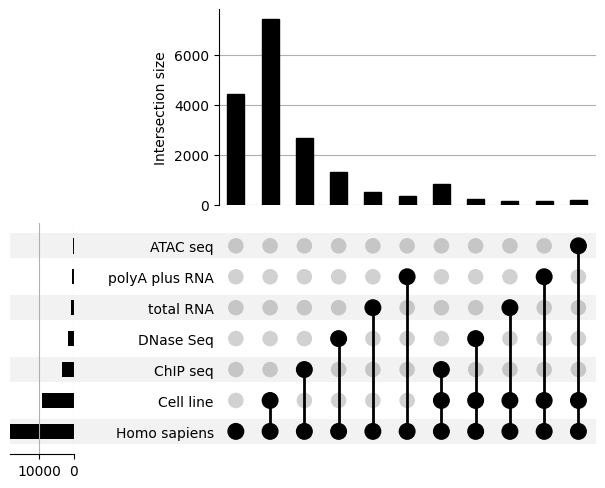

In [36]:
# Define the subset counts
homo_sapiens_count = 18278
cell_line_count = 9008

cl_atac_seq_count = 203
cl_chip_seq_count = 843
cl_dnase_seq_count = 225
cl_RNA_total_seq_count = 161
cl_RNA_polyA_count = 147

atac_seq_count = 261
chip_seq_count = 2401
dnase_seq_count = 1322
RNA_total_seq_count = 510
RNA_polyA_count = 347

# Create a data frame with zeros
data = pd.DataFrame(np.zeros((homo_sapiens_count, 7), dtype=int), columns=['Homo sapiens', 'Cell line', 'ATAC seq', 'ChIP seq', 'DNase Seq','total RNA', 'polyA plus RNA'])


# Set values to 1 based on subset counts
data.loc[:cell_line_count-1, 'Cell line'] = 1

index = 0
data.loc[index:cl_atac_seq_count-1, 'ATAC seq'] = 1
index = index + cl_atac_seq_count
data.loc[index:index+cl_chip_seq_count-1, 'ChIP seq'] = 1
index = index + cl_chip_seq_count
data.loc[index:index+cl_dnase_seq_count-1, 'DNase Seq'] = 1
index = index + cl_dnase_seq_count
data.loc[index:index+cl_RNA_total_seq_count-1, 'total RNA'] = 1
index = index + cl_RNA_total_seq_count
data.loc[index:index+cl_RNA_polyA_count-1, 'polyA plus RNA'] = 1

index = cell_line_count
data.loc[index:index+atac_seq_count-1, 'ChIP seq'] = 1
index = index + atac_seq_count
data.loc[index:index+chip_seq_count-1, 'ChIP seq'] = 1
index = index + chip_seq_count
data.loc[index:index+dnase_seq_count-1, 'DNase Seq'] = 1
index = index + dnase_seq_count
data.loc[index:index+RNA_total_seq_count-1, 'total RNA'] = 1
index = index + RNA_total_seq_count
data.loc[index:index+RNA_polyA_count-1, 'polyA plus RNA'] = 1

# Set all samples to Homo sapiens
data['Homo sapiens'] = 1


upset_data = data[['Homo sapiens', 'Cell line', 'ATAC seq', 'ChIP seq', 'DNase Seq','total RNA', 'polyA plus RNA']]
example = upset_data.groupby(['Homo sapiens', 'Cell line', 'ATAC seq', 'ChIP seq', 'DNase Seq','total RNA', 'polyA plus RNA']).size()
upset = UpSet(example)
upset.plot()

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

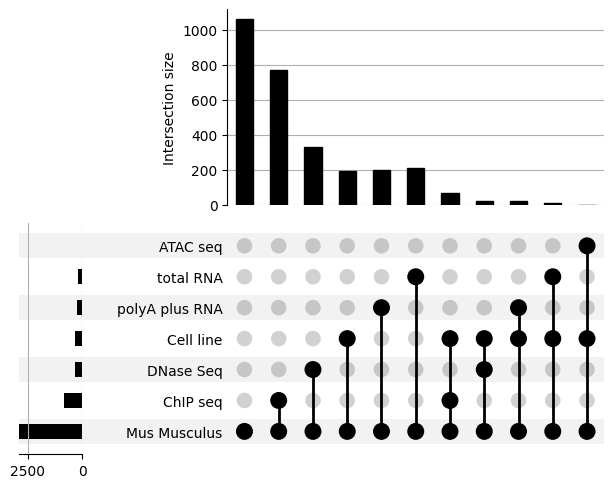

In [37]:
# Define the subset counts
homo_sapiens_count = 2905 
cell_line_count = 326 

cl_atac_seq_count = 3
cl_chip_seq_count = 69
cl_dnase_seq_count = 25
cl_RNA_total_seq_count = 10
cl_RNA_polyA_count = 23

atac_seq_count = 88
chip_seq_count = 684
dnase_seq_count = 331
RNA_total_seq_count = 210
RNA_polyA_count = 201

# Create a data frame with zeros
data = pd.DataFrame(np.zeros((homo_sapiens_count, 7), dtype=int), columns=['Mus Musculus', 'Cell line', 'ATAC seq', 'ChIP seq', 'DNase Seq','total RNA', 'polyA plus RNA'])


# Set values to 1 based on subset counts
data.loc[:cell_line_count-1, 'Cell line'] = 1

index = 0
data.loc[index:cl_atac_seq_count-1, 'ATAC seq'] = 1
index = index + cl_atac_seq_count
data.loc[index:index+cl_chip_seq_count-1, 'ChIP seq'] = 1
index = index + cl_chip_seq_count
data.loc[index:index+cl_dnase_seq_count-1, 'DNase Seq'] = 1
index = index + cl_dnase_seq_count
data.loc[index:index+cl_RNA_total_seq_count-1, 'total RNA'] = 1
index = index + cl_RNA_total_seq_count
data.loc[index:index+cl_RNA_polyA_count-1, 'polyA plus RNA'] = 1

index = cell_line_count
data.loc[index:index+atac_seq_count-1, 'ChIP seq'] = 1
index = index + atac_seq_count
data.loc[index:index+chip_seq_count-1, 'ChIP seq'] = 1
index = index + chip_seq_count
data.loc[index:index+dnase_seq_count-1, 'DNase Seq'] = 1
index = index + dnase_seq_count
data.loc[index:index+RNA_total_seq_count-1, 'total RNA'] = 1
index = index + RNA_total_seq_count
data.loc[index:index+RNA_polyA_count-1, 'polyA plus RNA'] = 1

# Set all samples to Homo sapiens
data['Mus Musculus'] = 1


upset_data = data[['Mus Musculus', 'Cell line', 'ATAC seq', 'ChIP seq', 'DNase Seq','total RNA', 'polyA plus RNA']]
example = upset_data.groupby(['Mus Musculus', 'Cell line', 'ATAC seq', 'ChIP seq', 'DNase Seq','total RNA', 'polyA plus RNA']).size()
upset = UpSet(example)
upset.plot()

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

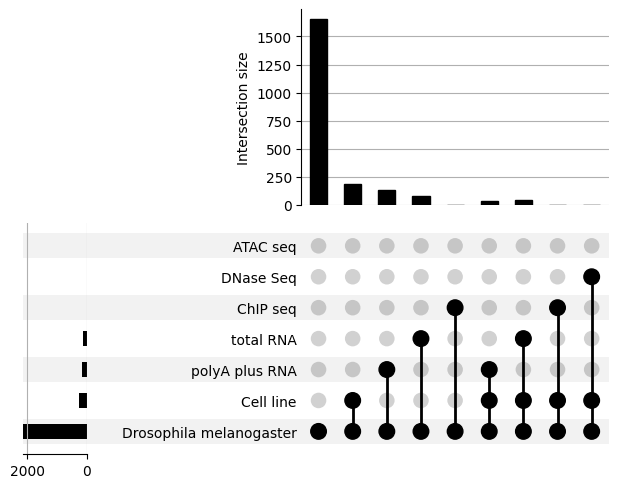

In [40]:
# Define the subset counts
homo_sapiens_count = 2145
cell_line_count = 271 

cl_atac_seq_count = 0
cl_chip_seq_count = 1
cl_dnase_seq_count = 3
cl_RNA_total_seq_count = 46
cl_RNA_polyA_count = 35

atac_seq_count = 0
chip_seq_count = 3
dnase_seq_count = 0
RNA_total_seq_count = 79
RNA_polyA_count = 134

# Create a data frame with zeros
data = pd.DataFrame(np.zeros((homo_sapiens_count, 7), dtype=int), columns=['Drosophila melanogaster', 'Cell line', 'ATAC seq', 'ChIP seq', 'DNase Seq','total RNA', 'polyA plus RNA'])


# Set values to 1 based on subset counts
data.loc[:cell_line_count-1, 'Cell line'] = 1

index = 0
data.loc[index:cl_atac_seq_count-1, 'ATAC seq'] = 1
index = index + cl_atac_seq_count
data.loc[index:index+cl_chip_seq_count-1, 'ChIP seq'] = 1
index = index + cl_chip_seq_count
data.loc[index:index+cl_dnase_seq_count-1, 'DNase Seq'] = 1
index = index + cl_dnase_seq_count
data.loc[index:index+cl_RNA_total_seq_count-1, 'total RNA'] = 1
index = index + cl_RNA_total_seq_count
data.loc[index:index+cl_RNA_polyA_count-1, 'polyA plus RNA'] = 1

index = cell_line_count
data.loc[index:index+atac_seq_count-1, 'ChIP seq'] = 1
index = index + atac_seq_count
data.loc[index:index+chip_seq_count-1, 'ChIP seq'] = 1
index = index + chip_seq_count
data.loc[index:index+dnase_seq_count-1, 'DNase Seq'] = 1
index = index + dnase_seq_count
data.loc[index:index+RNA_total_seq_count-1, 'total RNA'] = 1
index = index + RNA_total_seq_count
data.loc[index:index+RNA_polyA_count-1, 'polyA plus RNA'] = 1

# Set all samples to Homo sapiens
data['Drosophila melanogaster'] = 1


upset_data = data[['Drosophila melanogaster', 'Cell line', 'ATAC seq', 'ChIP seq', 'DNase Seq','total RNA', 'polyA plus RNA']]
example = upset_data.groupby(['Drosophila melanogaster', 'Cell line', 'ATAC seq', 'ChIP seq', 'DNase Seq','total RNA', 'polyA plus RNA']).size()
upset = UpSet(example)
upset.plot()

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

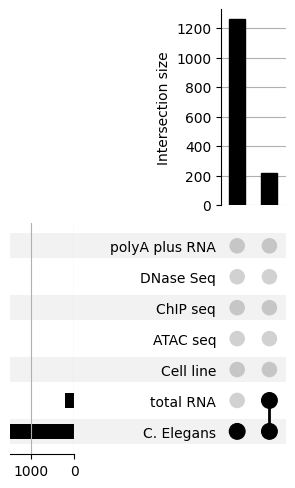

In [41]:
# Define the subset counts
homo_sapiens_count = 1482
cell_line_count = 0

cl_atac_seq_count = 0
cl_chip_seq_count = 0
cl_dnase_seq_count = 0
cl_RNA_total_seq_count = 0
cl_RNA_polyA_count = 0

atac_seq_count = 0
chip_seq_count = 0
dnase_seq_count = 0
RNA_total_seq_count = 218
RNA_polyA_count = 0

# Create a data frame with zeros
data = pd.DataFrame(np.zeros((homo_sapiens_count, 7), dtype=int), columns=['C. Elegans', 'Cell line', 'ATAC seq', 'ChIP seq', 'DNase Seq','total RNA', 'polyA plus RNA'])


# Set values to 1 based on subset counts
data.loc[:cell_line_count-1, 'Cell line'] = 1

index = 0
data.loc[index:cl_atac_seq_count-1, 'ATAC seq'] = 1
index = index + cl_atac_seq_count
data.loc[index:index+cl_chip_seq_count-1, 'ChIP seq'] = 1
index = index + cl_chip_seq_count
data.loc[index:index+cl_dnase_seq_count-1, 'DNase Seq'] = 1
index = index + cl_dnase_seq_count
data.loc[index:index+cl_RNA_total_seq_count-1, 'total RNA'] = 1
index = index + cl_RNA_total_seq_count
data.loc[index:index+cl_RNA_polyA_count-1, 'polyA plus RNA'] = 1

index = cell_line_count
data.loc[index:index+atac_seq_count-1, 'ChIP seq'] = 1
index = index + atac_seq_count
data.loc[index:index+chip_seq_count-1, 'ChIP seq'] = 1
index = index + chip_seq_count
data.loc[index:index+dnase_seq_count-1, 'DNase Seq'] = 1
index = index + dnase_seq_count
data.loc[index:index+RNA_total_seq_count-1, 'total RNA'] = 1
index = index + RNA_total_seq_count
data.loc[index:index+RNA_polyA_count-1, 'polyA plus RNA'] = 1

# Set all samples to Homo sapiens
data['C. Elegans'] = 1


upset_data = data[['C. Elegans', 'Cell line', 'ATAC seq', 'ChIP seq', 'DNase Seq','total RNA', 'polyA plus RNA']]
example = upset_data.groupby(['C. Elegans', 'Cell line', 'ATAC seq', 'ChIP seq', 'DNase Seq','total RNA', 'polyA plus RNA']).size()
upset = UpSet(example)
upset.plot()

## Tissue cells

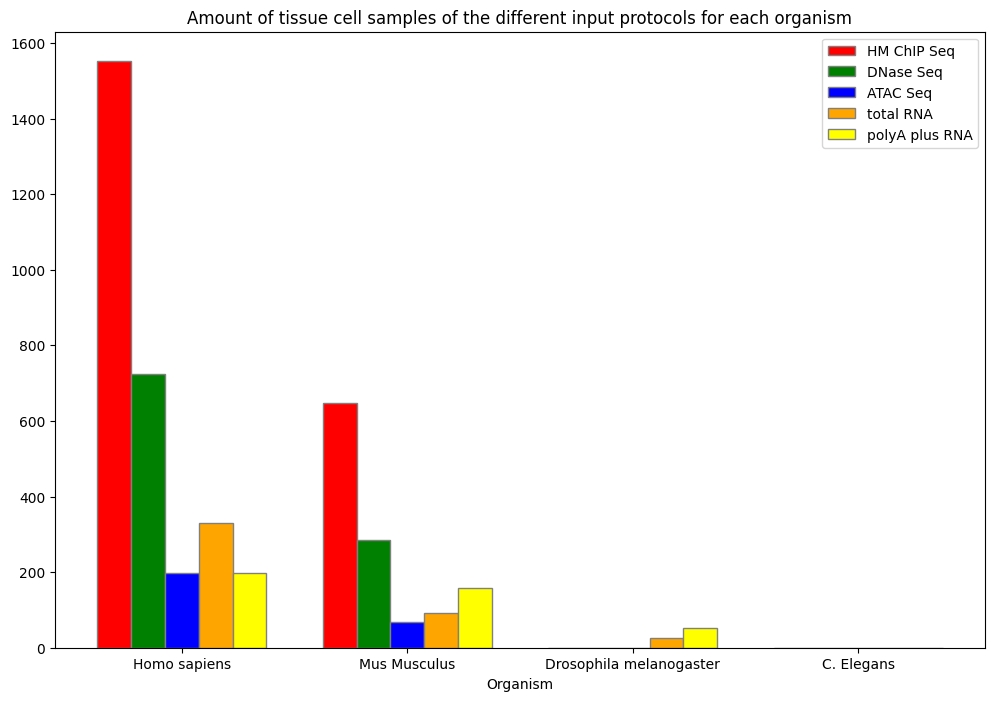

In [50]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
ChIP = [1552, 647, 0, 0]
DNase = [723, 286, 0, 0]
ATAC = [197, 68, 0, 0]
RNA_total = [329, 93, 25, 0]
RNA_polyA = [197, 158, 52, 0]
 
# Set position of bar on X axis
br1 = np.arange(len(ChIP))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
 
# Make the plot
plt.bar(br1, ChIP, color ='r', width = barWidth,
        edgecolor ='grey', label ='HM ChIP Seq')
plt.bar(br2, DNase, color ='g', width = barWidth,
        edgecolor ='grey', label ='DNase Seq')
plt.bar(br3, ATAC, color ='blue', width = barWidth,
        edgecolor ='grey', label ='ATAC Seq')
plt.bar(br4, RNA_total, color ='orange', width = barWidth,
        edgecolor ='grey', label ='total RNA')
plt.bar(br5, RNA_polyA, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='polyA plus RNA')
    
# Adding Xticks
plt.xlabel('Organism')
plt.xticks([r + barWidth*2 for r in range(len(ChIP))],
        ['Homo sapiens','Mus Musculus','Drosophila melanogaster','C. Elegans'])
plt.title('Amount of tissue cell samples of the different input protocols for each organism')
plt.legend()
plt.show()

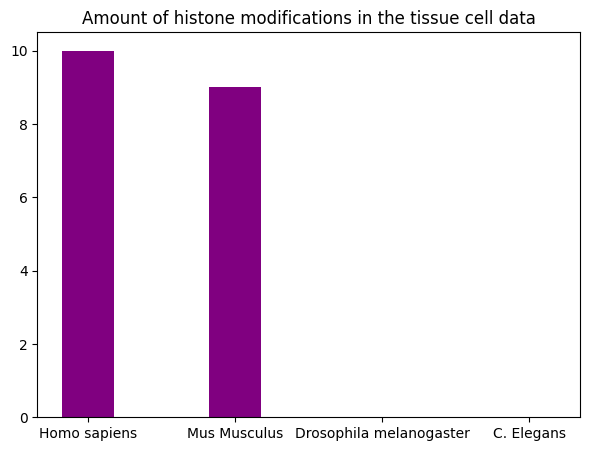

In [52]:
# number of histone mods
N = 4
 
mods = (10, 9, 0, 0)
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(7, 5))
p1 = plt.bar(ind, mods, width, color='purple')
 
#plt.ylabel('Contribution')
plt.title('Amount of histone modifications in the tissue cell data')
plt.xticks(ind, ('Homo sapiens', 'Mus Musculus', 'Drosophila melanogaster', 'C. Elegans'))

plt.show()

## Primary cells

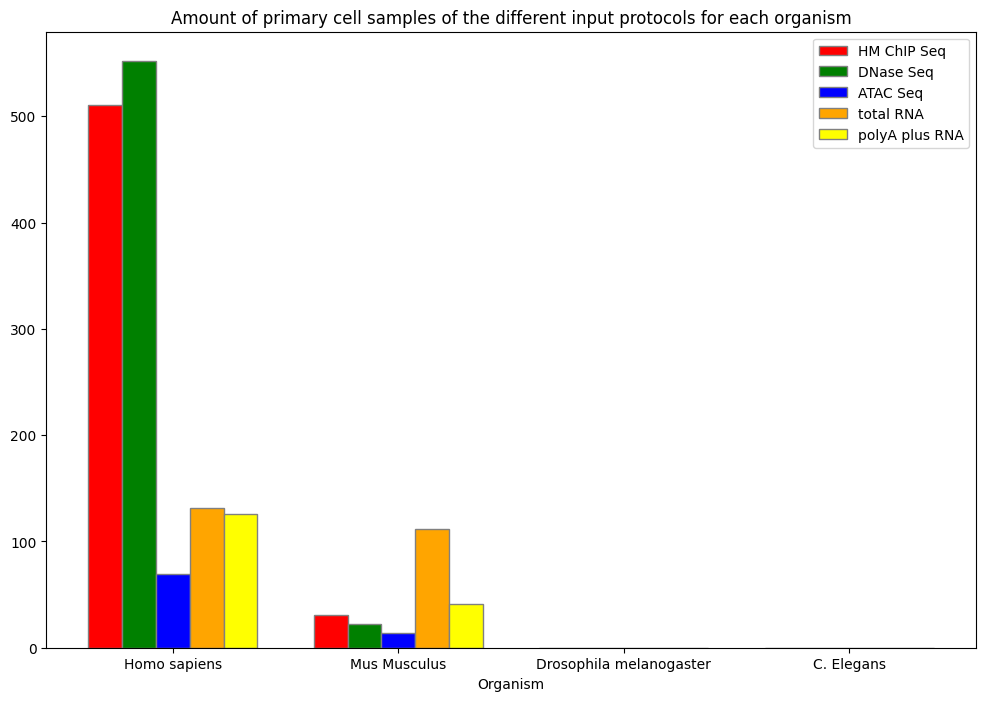

In [53]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
ChIP = [511, 31, 0, 0]
DNase = [552, 22, 0, 0]
ATAC = [69, 14, 0, 0]
RNA_total = [131, 112, 0, 0]
RNA_polyA = [126, 41, 0, 0]
 
# Set position of bar on X axis
br1 = np.arange(len(ChIP))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
 
# Make the plot
plt.bar(br1, ChIP, color ='r', width = barWidth,
        edgecolor ='grey', label ='HM ChIP Seq')
plt.bar(br2, DNase, color ='g', width = barWidth,
        edgecolor ='grey', label ='DNase Seq')
plt.bar(br3, ATAC, color ='blue', width = barWidth,
        edgecolor ='grey', label ='ATAC Seq')
plt.bar(br4, RNA_total, color ='orange', width = barWidth,
        edgecolor ='grey', label ='total RNA')
plt.bar(br5, RNA_polyA, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='polyA plus RNA')
    
# Adding Xticks
plt.xlabel('Organism')
plt.xticks([r + barWidth*2 for r in range(len(ChIP))],
        ['Homo sapiens','Mus Musculus','Drosophila melanogaster','C. Elegans'])
plt.title('Amount of primary cell samples of the different input protocols for each organism')
plt.legend()
plt.show()

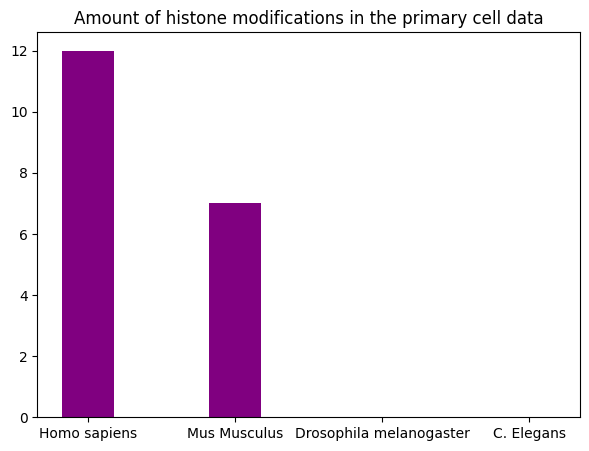

In [54]:
# number of histone mods
N = 4
 
mods = (12, 7, 0, 0)
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(7, 5))
p1 = plt.bar(ind, mods, width, color='purple')
 
#plt.ylabel('Contribution')
plt.title('Amount of histone modifications in the primary cell data')
plt.xticks(ind, ('Homo sapiens', 'Mus Musculus', 'Drosophila melanogaster', 'C. Elegans'))

plt.show()